<a href="https://colab.research.google.com/github/sabahonarmand/DataMining-Clustering/blob/main/Project3_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project3 - Data Mining**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
dataframe2 =pd.read_csv("dataset.csv")
dataframe = dataframe2.drop(['Cluster'], axis=1)
dataframe

,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
0,0.0,0.000,57.0,1.43050,1.6093,0.0,55.778,-2.85,25.556
1,0.0,0.000,57.0,1.65400,2.9505,0.0,55.778,-4.40,25.556
2,0.0,0.000,57.0,2.50340,3.1740,0.0,55.778,-5.85,25.556
3,0.0,16.093,61.0,2.50340,3.8445,0.0,55.778,-6.30,25.556
4,0.0,16.093,62.0,2.54810,3.2187,0.0,55.778,-5.62,25.556
...,...,...,...,...,...,...,...,...,...
4430,0.0,30610.000,100.0,3.03990,1.8329,0.0,54.559,-1.20,22.778
4431,0.0,30626.000,100.0,2.59280,0.0000,0.0,54.559,-1.77,22.778
4432,0.0,30626.000,100.0,1.69870,0.0000,0.0,54.559,-1.29,22.778
4433,0.0,30626.000,99.0,0.98349,0.0000,0.0,54.559,0.09,22.778


**Preprocessing**

In [ ]:
#detect missing values
missing_data = dataframe.isna()
missing_data_count = missing_data.loc[:,:].sum()
missing_data_count


Power(watts)          2
Distance(metres)      3
Heartrate(BPM)        5
Speed(m/s)            5
WindSpeed (m/s)      18
Cadaence(revs/s)      4
Elevation(meters)     1
Hill slope(%)         2
Temperature(C)        2
dtype: int64

In [ ]:
#fill missing data with mean
Power = dataframe['Power(watts)'].mean() 
dataframe['Power(watts)'].fillna(Power, inplace = True)
Distance = dataframe['Distance(metres)'].mean() 
dataframe['Distance(metres)'].fillna(Distance, inplace = True)
Heartrate = dataframe['Heartrate(BPM)'].mean() 
dataframe['Heartrate(BPM)'].fillna(Heartrate, inplace = True)
Speed = dataframe['Speed(m/s)'].mean() 
dataframe['Speed(m/s)'].fillna(Speed, inplace = True) 
WindSpeed = dataframe['WindSpeed (m/s)'].mean() 
dataframe['WindSpeed (m/s)'].fillna(WindSpeed, inplace = True)
Cadaence = dataframe['Cadaence(revs/s)'].mean() 
dataframe['Cadaence(revs/s)'].fillna(Cadaence, inplace = True) 
Elevation = dataframe['Elevation(meters)'].mean() 
dataframe['Elevation(meters)'].fillna(Elevation, inplace = True)
Hill_slope = dataframe['Hill slope(%)'].mean() 
dataframe['Hill slope(%)'].fillna(Hill_slope, inplace = True) 
Temperature = dataframe['Temperature(C)'].mean() 
dataframe['Temperature(C)'].fillna(Temperature, inplace = True)  
missing_data = dataframe.isna()
missing_data_count = missing_data.loc[:,:].sum()
missing_data_count

Power(watts)         0
Distance(metres)     0
Heartrate(BPM)       0
Speed(m/s)           0
WindSpeed (m/s)      0
Cadaence(revs/s)     0
Elevation(meters)    0
Hill slope(%)        0
Temperature(C)       0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

#Detect outliers data
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers 
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dataframe

,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
6,0.00,16.093,65.0,2.6822,4.4704,0.26667,55.778,-3.45,25.556
7,19.51,16.093,68.0,2.8163,4.1128,0.51667,55.169,-2.14,25.556
8,48.47,16.093,69.0,3.1293,3.8445,0.60000,55.169,-1.62,25.556
9,70.79,32.187,71.0,3.5316,3.8445,0.66667,55.169,-0.69,25.556
10,91.38,32.187,75.0,3.8892,4.0233,0.75000,55.169,-0.30,25.556
...,...,...,...,...,...,...,...,...,...
4420,202.56,30577.000,99.0,5.2304,6.4821,1.08330,54.254,2.61,22.778
4421,188.89,30577.000,100.0,5.2304,4.3810,1.08330,54.254,2.14,22.778
4422,160.36,30577.000,100.0,5.2304,4.0233,1.08330,54.254,1.79,22.778
4423,104.14,30594.000,100.0,5.0962,4.7386,0.98333,54.559,1.68,22.778


**Question2**

In [ ]:
#dataframe get numeric columns
newdf = dataframe.select_dtypes(include=np.number)
# newdf
newdf.describe()

,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
count,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000
mean,234.054366,12492.383074,144.179740,6.469248,5.719182,1.194342,298.739210,4.422299,22.516403
std,91.952173,8154.495273,22.772609,3.510520,4.401652,0.256725,202.229527,6.574578,2.132864
min,0.000000,16.093000,65.000000,2.458700,0.000000,0.183330,48.158000,-12.740000,18.889000
25%,168.800000,6827.625000,126.000000,3.263400,2.190500,0.983330,79.553000,-0.830000,21.111000
50%,242.805000,10171.000000,147.000000,5.409200,4.872700,1.200000,288.340000,3.710000,22.778000
75%,294.712500,17860.000000,166.000000,9.119600,8.493700,1.400000,510.240000,10.250000,24.444000
max,525.270000,30594.000000,174.000000,15.289000,18.507000,2.050000,628.500000,19.030000,26.111000


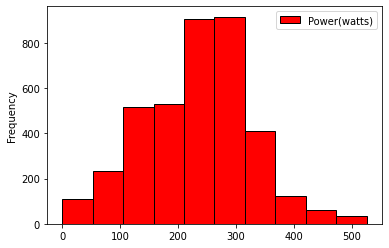

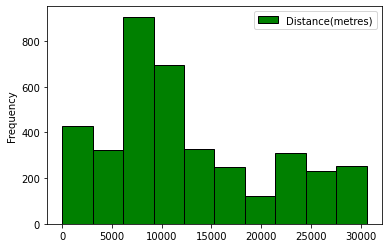

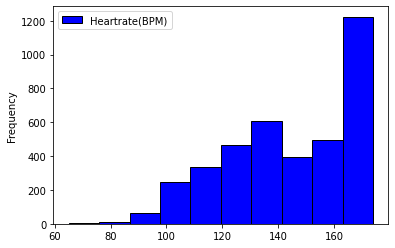

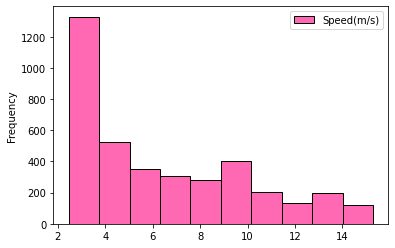

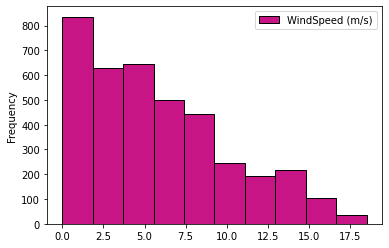

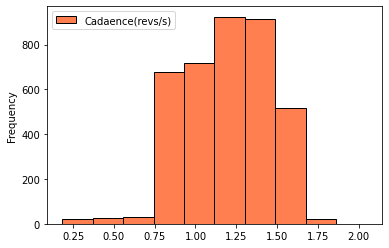

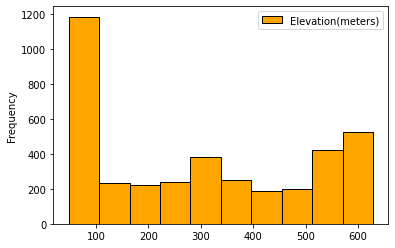

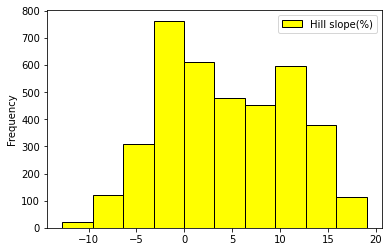

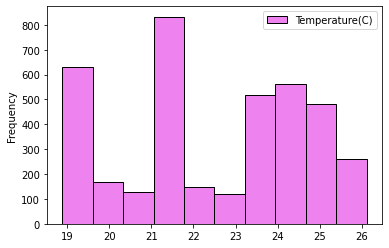

In [ ]:
Power = newdf.loc[:,['Power(watts)']].plot.hist(color = 'red', edgecolor = 'black')    #To select all rows and a select columns we use .loc accessor with square bracket.
Distance = newdf.loc[:,['Distance(metres)']].plot.hist(color = 'green', edgecolor = 'black')
Heartrate = newdf.loc[:,['Heartrate(BPM)']].plot.hist(color = 'Blue', edgecolor = 'black')
Speed = newdf.loc[:,['Speed(m/s)']].plot.hist(color = 'HotPink', edgecolor = 'black')
WindSpeed = newdf.loc[:,['WindSpeed (m/s)']].plot.hist(color = 'MediumVioletRed', edgecolor = 'black')
Cadaence = newdf.loc[:,['Cadaence(revs/s)']].plot.hist(color = 'Coral', edgecolor = 'black')
Elevation = newdf.loc[:,['Elevation(meters)']].plot.hist(color = 'Orange', edgecolor = 'black')
Hill_slope = newdf.loc[:,['Hill slope(%)']].plot.hist(color = 'Yellow', edgecolor = 'black')
Temperature = newdf.loc[:,['Temperature(C)']].plot.hist(color = 'Violet', edgecolor = 'black')

([<matplotlib.patches.Wedge at 0x7f2ed7d117d0>,
 [Text(0.6032899554997707, 0.919804995416466, 'C'),
  Text(-0.7880794190495655, 0.7674182883346603, 'F'),
  Text(-1.0996015127846144, 0.029605963618626528, 'A'),
  Text(-0.8688599651313801, -0.6745979254281006, 'G'),
  Text(-0.34065962031869707, -1.045921136168651, 'E'),
  Text(0.22171155677929608, -1.0774247006591695, 'B'),
  Text(0.688967297866954, -0.8575103862169298, 'I'),
  Text(0.9819576009063895, -0.4957411320660895, 'H'),
  Text(1.090568154242734, -0.14373969859296606, 'D')],
 [Text(0.3290672484544203, 0.5017118156817086, '31.5%'),
  Text(-0.4298615012997629, 0.4185917936370874, '12.4%'),
  Text(-0.5997826433370623, 0.01614870742834174, '11.3%'),
  Text(-0.4739236173443891, -0.3679625047789639, '10.5%'),
  Text(-0.18581433835565295, -0.5705024379101731, '8.4%'),
  Text(0.12093357642507058, -0.587686200359547, '8.0%'),
  Text(0.37580034429106574, -0.4677329379365071, '7.0%'),
  Text(0.5356132368580305, -0.2704042538542306, '6.5%'),

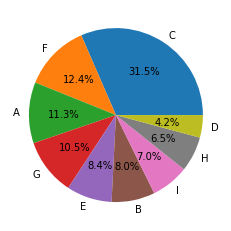

In [ ]:
cluster = ['C','F','A','G','E','B','I', 'H','D']
plt.pie(dataframe2['Cluster'].value_counts(normalize = True),labels = cluster,autopct='%1.1f%%')

**Question3**

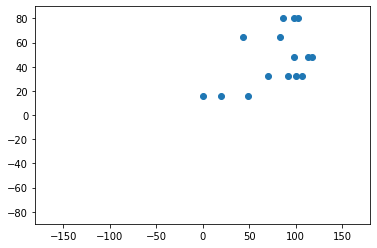

(3850,)
[[ 2.01927059e+02  1.73266654e+04  1.40448529e+02  9.05367537e+00
   9.78421618e+00  1.41372375e+00  5.27100147e+02 -3.49080882e-01
   1.89502132e+01]
 [ 2.74973663e+02  8.22061468e+03  1.66175583e+02  3.34715391e+00
   2.61802716e+00  1.02837246e+00  3.05403320e+02  1.07224143e+01
   2.40228176e+01]
 [ 2.74423849e+02  2.58121429e+04  1.26424603e+02  1.21607139e+01
   1.18917571e+01  1.40839885e+00  1.16393722e+02 -3.41539683e+00
   2.16228730e+01]
 [ 1.69256266e+02  1.65247802e+03  1.12921162e+02  7.07480498e+00
   6.68332531e+00  1.25764108e+00  6.36645851e+01  8.52385892e-01
   2.52110249e+01]
 [ 2.27654207e+02  2.89644096e+04  1.40638376e+02  8.80254354e+00
   7.82318266e+00  1.27601653e+00  6.81244649e+01  9.12177122e-02
   2.18062878e+01]
 [ 2.34987667e+02  5.75202180e+03  1.34263862e+02  5.99177189e+00
   4.83964436e+00  1.21692157e+00  1.05777019e+02  5.88577438e+00
   2.46959579e+01]
 [ 2.41517107e+02  2.18984187e+04  1.36716253e+02  7.81790083e+00
   7.99116309e+00  1

In [ ]:
from sklearn.cluster import KMeans

plt.scatter(dataframe['Power(watts)'],dataframe['Distance(metres)'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
kmeans = KMeans(n_clusters=9)
kmeans.fit(dataframe)
predict_kmeans = kmeans.predict(dataframe)
print(predict_kmeans.shape)
y_kmeans = kmeans.cluster_centers_
print(y_kmeans)

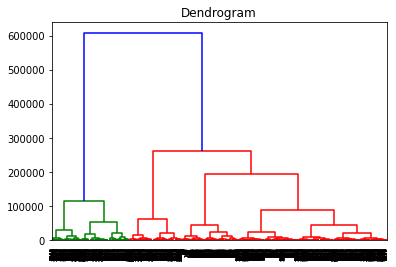

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=9, affinity='euclidean')
model.fit(dataframe)

dendrogram = sch.dendrogram(sch.linkage(dataframe, method  = "ward"))

plt.title('Dendrogram')
plt.show()

In [ ]:
pip install bcubed

In [ ]:
#kmean bcubed validation
import bcubed
cdict = { i:set([dataframe2.loc[:,'Cluster'][i]])  for i in range(3850)}
ldict = { i:set([predict_kmeans[i]])  for i in range(3850)}
precision = bcubed.precision(cdict, ldict)
recall = bcubed.recall(cdict, ldict)
fscore = bcubed.fscore(precision, recall)

print(precision, recall, fscore )


0.43029148031960085 0.570767159967966 0.4906730461062298


In [ ]:
#hierarchical  bcubed validation
import bcubed
cdict = { i:set([dataframe2.loc[:,'Cluster'][i]])  for i in range(3850)}
ldict = { i:set([dendrogram[i]])  for i in range(5)}

precision = bcubed.precision(cdict, ldict)
recall = bcubed.recall(cdict, ldict)
fscore = bcubed.fscore(precision, recall)

print(precision, recall, fscore )

**Question4**

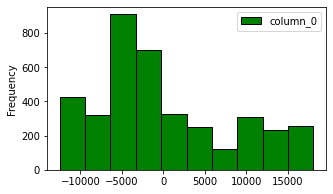

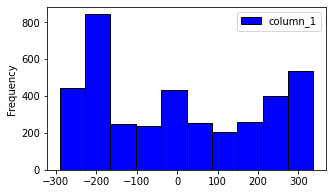

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataframe)
x_pca = pca.transform(dataframe)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['column_0','column_1']
column_0 = x_pca.loc[:,['column_0']].plot.hist(color = 'green', edgecolor = 'black')
column_1 = x_pca.loc[:,['column_1']].plot.hist(color = 'Blue', edgecolor = 'black')
x_pca
x=x_pca.to_numpy()

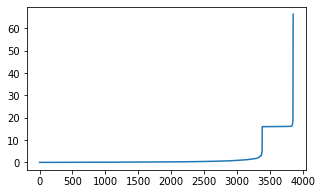

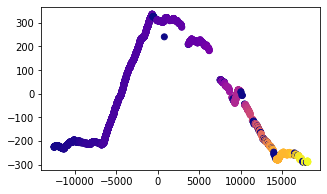

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x_pca) # fitting the data to the object
distances,indices=nbrs.kneighbors(x_pca) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

# #EPS = 20 chon enhena onja tamom mishe
# cluster the data into five clusters
dbscan = DBSCAN(eps = 20, min_samples = 4).fit(x_pca) # fitting the model
labels = dbscan.labels_ # getting the labels
labels
 # Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot